# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# READ CSV FILE

In [3]:
data = pd.read_csv("Furniture Price Prediction.csv")
data

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0
...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0


# CHECKING INFO OF DATASET

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   object 
 6   price      1961 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


# COUNT NULL VALUES

In [5]:
data.isnull().sum()

furniture     0
type          0
url           0
rate          0
delivery      0
sale          0
price        39
dtype: int64

# DROP URL COLUMN

In [6]:
data.drop(columns = ['url'], inplace=True) 

# DROP NULL VALUES

In [7]:
data.dropna(inplace=True)  

# REMOVING % SYMBOL

In [8]:
data['sale'] = data['sale'].str.replace('%', '', regex=False)
data['sale'] = data['sale'].astype(int)

# USING LABEL ENCODER TO CHANGE CATEGORICAL DATA TO NUMERICAL DATA

In [9]:
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])
data['furniture'] = encoder.fit_transform(data['furniture'])

In [10]:
data

,furniture,type,rate,delivery,sale,price
0,187,165,3.3,172.14,72,2500.0
1,187,264,0.0,172.14,54,1200.0
2,718,264,0.0,172.14,18,1099.0
3,193,264,0.0,172.14,58,1200.0
4,1107,264,5.0,52.44,54,1400.0
...,...,...,...,...,...,...
1995,259,51,0.0,656.28,0,1632.0
1996,291,205,0.0,172.14,0,11450.0
1997,209,34,0.0,52.44,0,550.0
1998,276,43,0.0,172.14,9,8495.0


# VISUALISING DATA

array([[<Axes: title={'center': 'furniture'}>,
        <Axes: title={'center': 'type'}>],
       [<Axes: title={'center': 'rate'}>,
        <Axes: title={'center': 'delivery'}>],
       [<Axes: title={'center': 'sale'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

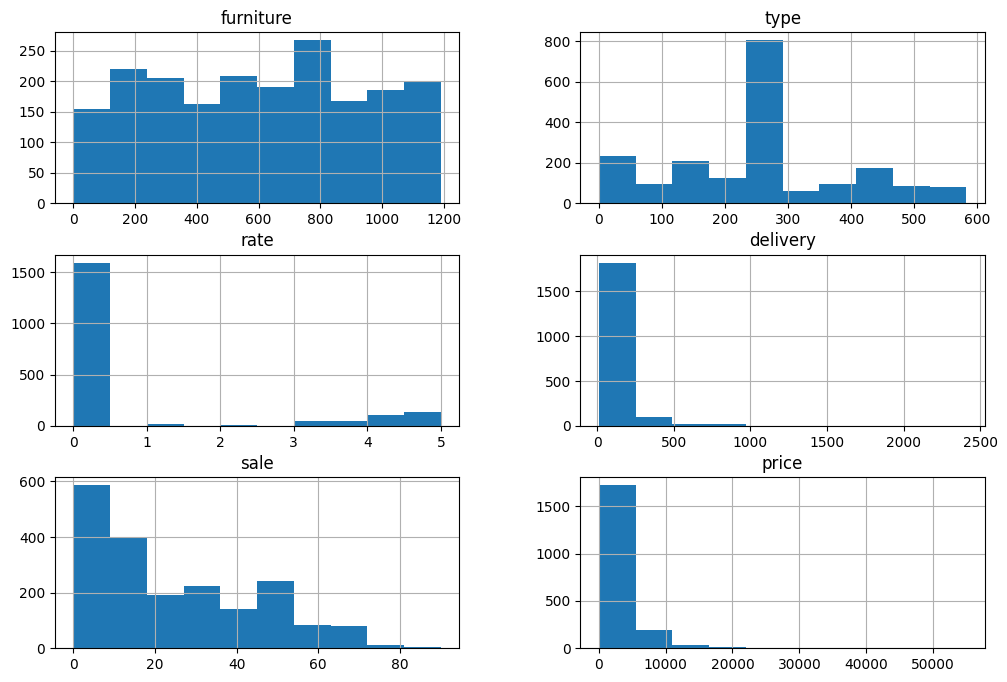

In [11]:
data.hist(figsize=(12,8))

# SPLIT INPUT OUTPUT COLUMNS 

In [12]:
xx = data.iloc[:,:5]
y = data.iloc[:,-1]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(xx,y,test_size=0.2,random_state=44)

# IMPORTING ALGORITHM

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
lr = DecisionTreeRegressor()

In [16]:
lr.fit(x_train,y_train)

DecisionTreeRegressor()

In [17]:
pred = lr.predict(x_test)

# CHECKING THE ACCURACY OF THE MODEL

In [18]:
r2_score(pred,y_test)

0.5421970129163523

# USING OTHER ALGORITHMS TO CHECK THE ACCURACY

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
rfr = RandomForestRegressor()

In [21]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
predic = rfr.predict(x_test)

In [23]:
r2_score(predic,y_test)

0.36204136920630414

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr.fit(x_train,y_train)

DecisionTreeRegressor()

In [26]:
predict = lr.predict(x_test)

In [27]:
r2_score(predict,y_test)

0.5324724905491361